# **Credit card fraud dection using machine learning** 



In this notebook, I will investigate a dataset containing credit card fraud


# __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Importing Required Libraries">Importing Required Libraries</a></li>
            <li><a href="#Load in dataset">Load in dataset</a></li>
            </ol>
    </li>
    <li>
        <a href="#Scenario">Scenario</a>
        <ol>
            <li><a href="#Data Description">Data Description</a></li>
        </ol>
    </li>
    <li>
        <a href="#Exploratory data analysis">Exploratory data analysis</a></li>
        <ol>
            <li><a href="#EDA intital notes">EDA inital notes</a></li>
            <li><a href="#EDA visulaisation">EDA visualisation</a></li>
            <li><a href="#EDA summary">EDA summary</a></li>
            <li><a href="#Do outliers hide fraud">Do outliers hide fraud</a></li>
        </ol>
    
</ol>


# Objectives

In this notebook I will

- Explore the credit card fraud data.
- Clean the data if needed
- Analyze data through using visualizations.



# Setup

### Importing Required Libraries

Libraries required for this notebook will be imported here

In [1]:
import pandas as pd

### Load in data

Data used: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [2]:
data = pd.read_csv("..\data\kaggel_credit_card_fraud_detection\creditcard.csv")
data.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


# Scenario

Understanding the credit card fraud dataset with EDA, followed by ML model creation, training, testing and assessment

### Data Description ###

The dataset used for this visualization project contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. Features V1-V28 have been deduced by PCA, and have names omitted due to confidentiality

The dataset includes the following variables:
<br>1. Time: Seconds elapsed between each transaction and the first transaction in the dataset.
<br>2-29. V1 - V28: Anonymised features deduced by PCA
<br>30. Amount: transaction Amount, this feature can be used for example-dependant cost-sensitive learning
<br>31. Class: Responce varialbe for fraud classification (0 = not fraud, 1 = fraud)




# Exploratory data analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
data.shape

(284807, 31)

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


### Initial EDA notes ###

Dataset is, as expected, cleaned with no missing values. 

### EDA visulaisation ###

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


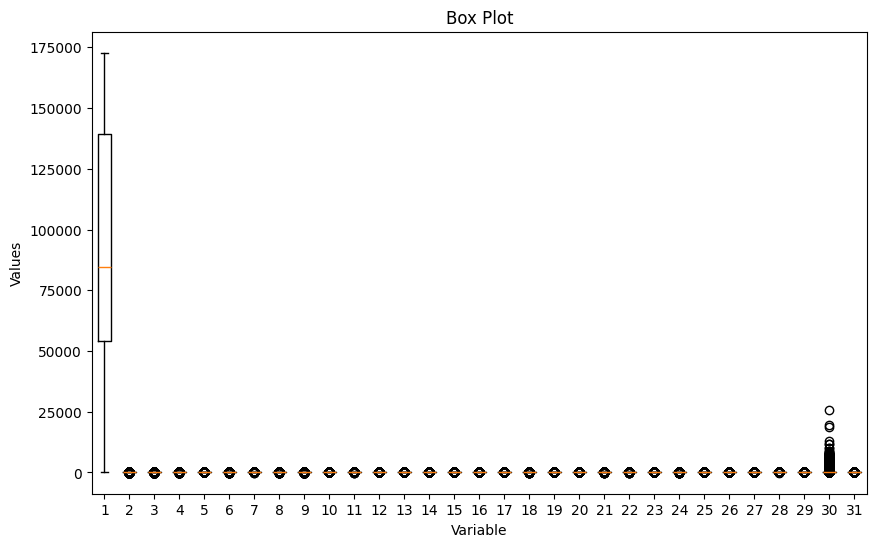

In [10]:
# Boxplots to visualise distrobution of data
plt.figure(figsize=(10, 6))

plt.boxplot(data)
plt.title("Box Plot")
plt.xlabel("Variable")
plt.ylabel("Values")
plt.show()

In [11]:
data_dist = data.drop(columns=['Time', 'Class', 'Amount'])
data_dist.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

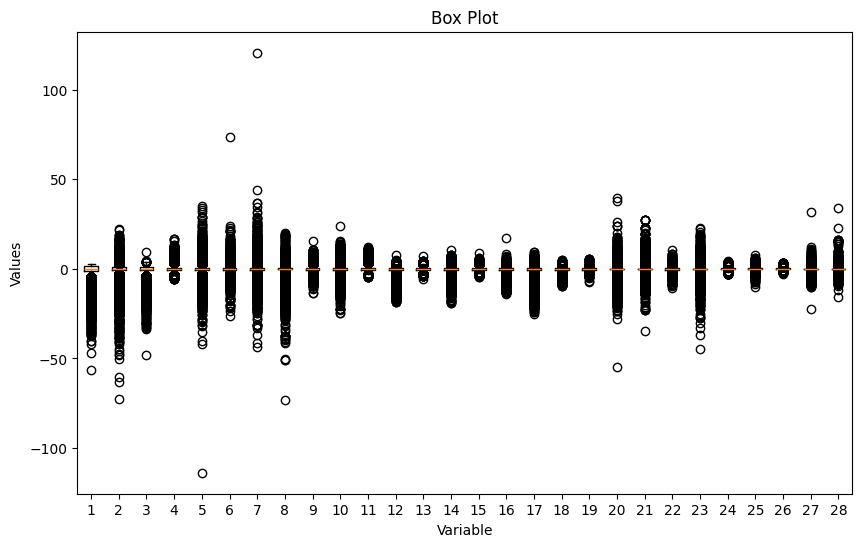

In [12]:
# Boxplots to visualise distrobution of data the hidden variables
plt.figure(figsize=(10, 6))

plt.boxplot(data_dist)
plt.title("Box Plot")
plt.xlabel("Variable")
plt.ylabel("Values")
plt.show()

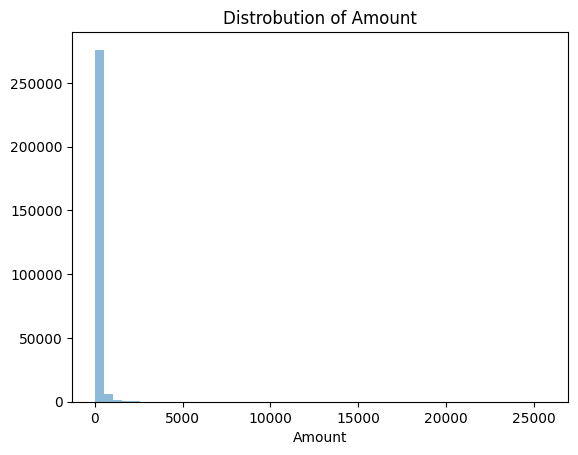

In [13]:
plt.hist(x=data['Amount'],bins=50,alpha=0.5)
plt.title("Distrobution of Amount")
plt.xlabel('Amount')
plt.show()

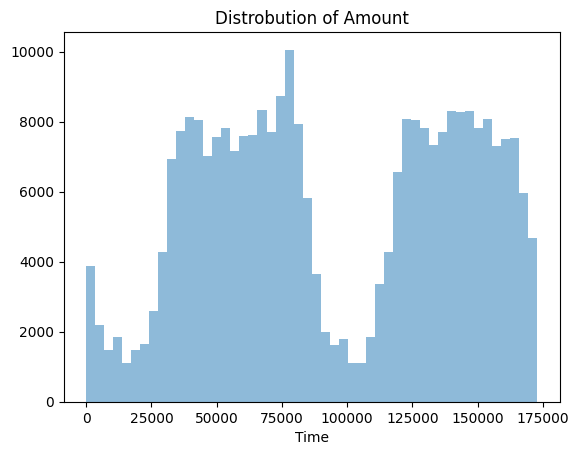

In [14]:
plt.hist(x=data['Time'],bins=50,alpha=0.5)
plt.title("Distrobution of Amount")
plt.xlabel('Time')
plt.show()

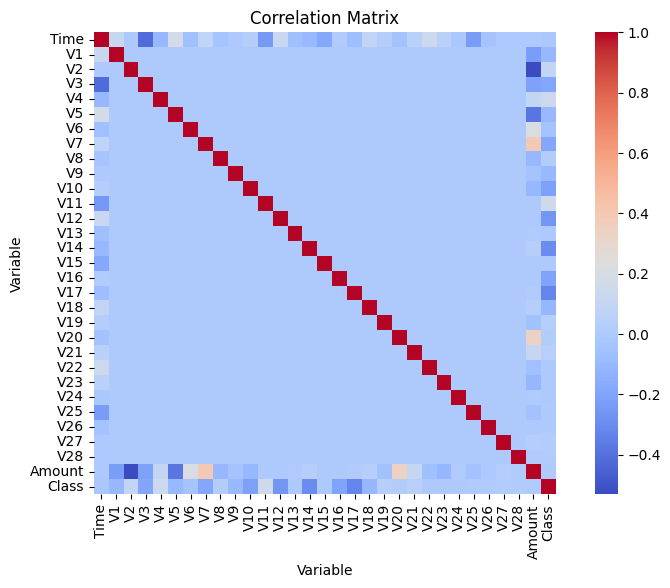

In [15]:
import seaborn as sns
plt.figure(figsize=(10, 6))

#correlation matrix 
sns.heatmap(data.corr(), fmt='.2f', cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.xlabel("Variable")
plt.ylabel("Variable")
plt.show()

In [16]:
data_correlated_variables = data.corr().loc['Class'].sort_values(ascending=False)
data_correlated_variables



Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

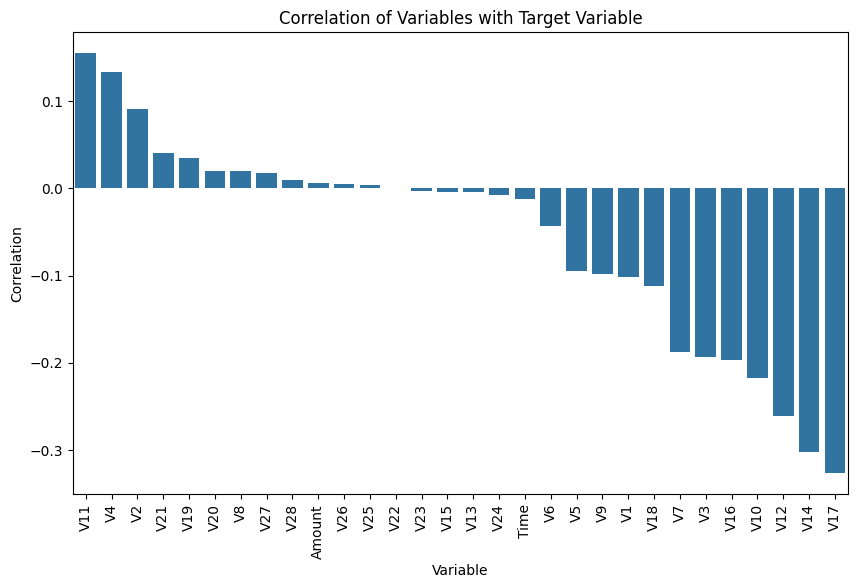

In [17]:
# barchart to visualise the correlation of the variables with the target variable
# the target variable is Class
data_correlated_variables = data_correlated_variables.drop('Class')
plt.figure(figsize=(10, 6))
sns.barplot(x=data_correlated_variables.index, y=data_correlated_variables.values)
plt.title("Correlation of Variables with Target Variable")
plt.xlabel("Variable")
plt.ylabel("Correlation")
plt.xticks(rotation=90)
plt.show()


## EDA summary

No variables are strongly correlated with the fraud class. For now I will keep all the features. Data set is pre-cleaned so no cleaning required. There are many outliers in the data, but given that outliers in information can be a result of outliers, I will keep them in for now. EDA will be revisited during post model development.


## Do outliers hide fraud? <br/>

The dataset contains many outliers, which should be removed for analysis to prevent model bias and improve accuracy. However, I want to see if the outliers in the data are indicitve of fraud. 

In [ ]:
# Summary statistics of the dataset
data.describe().T.sort_values(by='mean', ascending=False)


,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
Amount,284807.0,8.834962e+01,250.120109,0.000000,5.600000,22.000000,77.165000,25691.160000
Class,284807.0,1.727486e-03,0.041527,0.000000,0.000000,0.000000,0.000000,1.000000
V15,284807.0,4.887456e-15,0.915316,-4.498945,-0.582884,0.048072,0.648821,8.877742
V24,284807.0,4.473266e-15,0.605647,-2.836627,-0.354586,0.040976,0.439527,4.584549
V10,284807.0,2.239053e-15,1.088850,-24.588262,-0.535426,-0.092917,0.453923,23.745136
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V26,284807.0,1.683437e-15,0.482227,-2.604551,-0.326984,-0.052139,0.240952,3.517346
V11,284807.0,1.673327e-15,1.020713,-4.797473,-0.762494,-0.032757,0.739593,12.018913
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626


In [29]:
# Group by class and compute outliers using IQR
def count_outliers(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    outliers = group[(group < Q1 - 1.5 * IQR) | (group > Q3 + 1.5 * IQR)]
    return len(outliers)

outlier_counts = data.groupby('Class').apply(count_outliers)
print(outlier_counts)

Class
0    284315
1       492
dtype: int64


C:\Users\aiden\AppData\Local\Temp\ipykernel_25876\2722254163.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outlier_counts = data.groupby('Class').apply(count_outliers)


In [ ]:
# Apply function to each numerical column, grouped by 'Class'
outlier_counts = v.apply(lambda g: g.select_dtypes(include="number").apply(count_outliers))
print(outlier_counts)

       Time    V1     V2    V3     V4     V5     V6    V7     V8    V9  ...  \
Class                                                                   ...   
0         0  6912  13327  3095  10918  12124  22829  8668  23974  8090  ...   
1         0    52     46    53      0     45     15    30     98    17  ...   

         V21   V22    V23   V24   V25   V26    V27    V28  Amount  Class  
Class                                                                     
0      14273  1289  18411  4771  5314  5603  39018  30206   31862      0  
1         49    24     59     3    36     2     70     46      69      0  

[2 rows x 31 columns]


C:\Users\aiden\AppData\Local\Temp\ipykernel_25876\1925026106.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outlier_counts = data.groupby("Class").apply(lambda g: g.select_dtypes(include="number").apply(count_outliers))


In [42]:
print("Outlier counts per Class:")
outlier_counts.T

Outlier counts per Class:


Class,0,1
Time,0,0
V1,6912,52
V2,13327,46
V3,3095,53
V4,10918,0
V5,12124,45
V6,22829,15
V7,8668,30
V8,23974,98
V9,8090,17


In [45]:
print(data.groupby("Class").count().T)

Class        0    1
Time    284315  492
V1      284315  492
V2      284315  492
V3      284315  492
V4      284315  492
V5      284315  492
V6      284315  492
V7      284315  492
V8      284315  492
V9      284315  492
V10     284315  492
V11     284315  492
V12     284315  492
V13     284315  492
V14     284315  492
V15     284315  492
V16     284315  492
V17     284315  492
V18     284315  492
V19     284315  492
V20     284315  492
V21     284315  492
V22     284315  492
V23     284315  492
V24     284315  492
V25     284315  492
V26     284315  492
V27     284315  492
V28     284315  492
Amount  284315  492


In [47]:
#proportion of fraud cases
fraud_cases = data[data['Class'] == 1].shape[0]
total_cases = data.shape[0]
fraud_proportion = fraud_cases / total_cases
print(f"Proportion of fraud cases: {fraud_proportion:.2%}")
# Proportion of non-fraud cases
non_fraud_cases = data[data['Class'] == 0].shape[0]
non_fraud_proportion = non_fraud_cases / total_cases
print(f"Proportion of non-fraud cases: {non_fraud_proportion:.2%}")
# Proportion of fraud cases by class
fraud_by_class = data.groupby('Class').size() / total_cases
print("Proportion of fraud cases by class:")
print(fraud_by_class)

Proportion of fraud cases: 0.17%
Proportion of non-fraud cases: 99.83%
Proportion of fraud cases by class:
Class
0    0.998273
1    0.001727
dtype: float64


In [50]:
# Calculate proportion of Class 1 outliers per feature
proportion_class_1 = outlier_counts.T[1].div(outlier_counts.T.sum(axis=1))

print("\nProportion of outliers in Class 1 for each feature:")
print(proportion_class_1)


Proportion of outliers in Class 1 for each feature:
Time           NaN
V1        0.007467
V2        0.003440
V3        0.016836
V4        0.000000
V5        0.003698
V6        0.000657
V7        0.003449
V8        0.004071
V9        0.002097
V10       0.002077
V11       0.019920
V12       0.000398
V13       0.000000
V14       0.000290
V15       0.002767
V16       0.000000
V17       0.000000
V18       0.000000
V19       0.000493
V20       0.001481
V21       0.003421
V22       0.018279
V23       0.003194
V24       0.000628
V25       0.006729
V26       0.000357
V27       0.001791
V28       0.001521
Amount    0.002161
Class          NaN
dtype: float64


In [57]:
filtered_features_index = proportion_class_1[proportion_class_1 > 0.001727].index
print(filtered_features_index)



Index(['V1', 'V2', 'V3', 'V5', 'V7', 'V8', 'V9', 'V10', 'V11', 'V15', 'V21',
       'V22', 'V23', 'V25', 'V27', 'Amount'],
      dtype='object')
